<b><h2 id="toc">Table of Contents</h2></b>
<br>
<ol>
    <li>
        <a href="#1"><b>Problem Statement</b><a>
    </li>
    <br>
    <li>
        <b><a href="#2">Read Dataset</a></b>
    </li>
    <br>
    <li>
        <b><a href="#3">Data Exploration</a></b>
        <ul>
            <li>
                <a href="#3.1">Creating dummy variables</a>
            </li>
        </ul>
    </li>       
    <br>
    <li>
        <b><a href="#4">Creating Model</a></b>
        <ul>
            <li>
                <a href="#4.1">Normalize Data</a>
            </li>
            <li>
                <a href="#4.2">K-Nearest Neighbour (KNN) Classification</a>
            </li>
            <li>
                <a href="#4.3">Support Vector Machine (SVM) Algorithm</a>
            </li>
            <li>
                <a href="#4.4">Naive Bayes Algorithm</a>
            </li>
        </ul>
    </li>
    <br>
    <li>
        <b><a href="#5">Comparing models</a></b>
    </li>
    <li>
        <b><a href="#6">Confusion Matrix</a></b>
    </li>
    <li>
        <b><a href="#7">Conclusion</a></b>
    </li>
</ol>
    
    
        
    

<a name="1"></a>
<h3 id="ps">1. Problem Statement</h3>

<p> 
    We have a data which classified if patients have heart disease or not according to features in it. We will try to use this     data to create a model which tries predict if a patient has this disease or not.
</p>
<a name="2"></a>
<h3 id="ldata">2. Read Dataset</h3>
<p>
    <img src="https://miro.medium.com/max/2400/1*ooqlgirGtghlYIw0ujnBkA.jpeg">
</p>
<ul>
    <li>
        Data contains:
        <ul>
        <li>age - age in years</li>
        <li>sex - (1 = male; 0 = female)</li>
        <li>cp - chest pain type</li>
        <li>trestbps - resting blood pressure (in mm Hg on admission to the hospital)</li>
        <li>chol - serum cholestoral in mg/dl</li>
        <li>fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
        <li>restecg - resting electrocardiographic results</li>
        <li>thalach - maximum heart rate achieved</li>
        <li>exang - exercise induced angina (1 = yes; 0 = no)</li>
        <li>oldpeak - ST depression induced by exercise relative to rest</li>
        <li>slope - the slope of the peak exercise ST segment</li>
        <li>ca - number of major vessels (0-3) colored by flourosopy</li>
        <li>thal - 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
        <li>target - have disease or not (1=yes, 0=no)</li>
        </ul>
    </li>
</ul>
<h4 id="ip">Importing Packages</h4>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<h4 id="imdata">Read Dataset</h4>

In [3]:
# We are reading our data
df = pd.read_csv("C:\INSAID_MLintermediate_HeartDisease\heart-disease-uci\heart.csv")

In [4]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a name="3"></a>
<h3>3. Data Exploration</h3> 

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

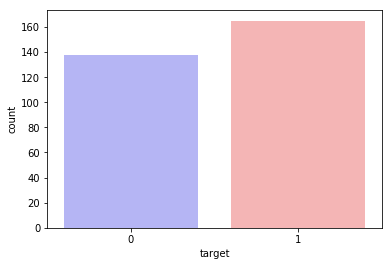

In [6]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [7]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


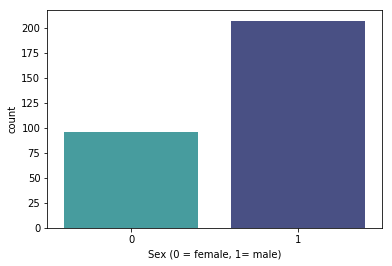

In [8]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [9]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))


Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


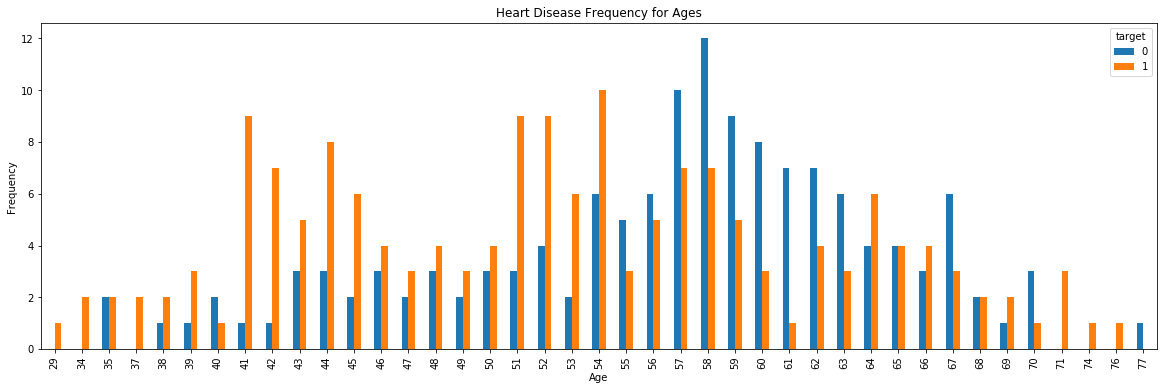

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


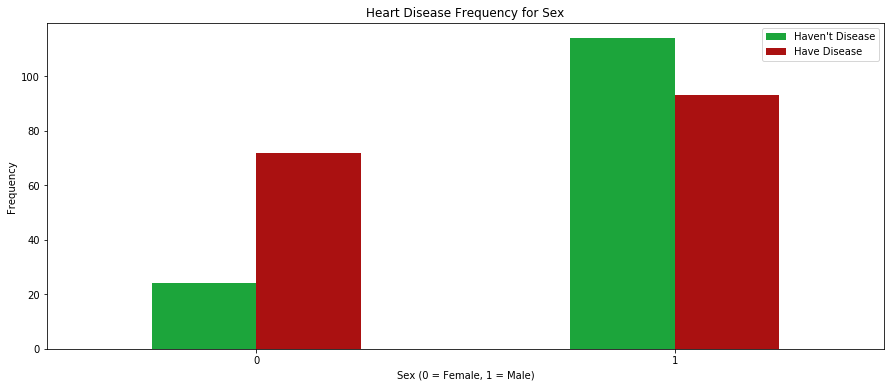

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

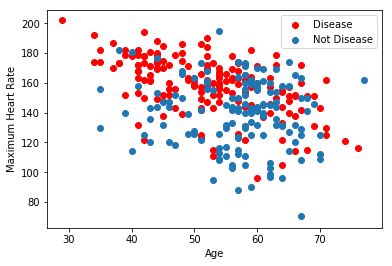

In [13]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

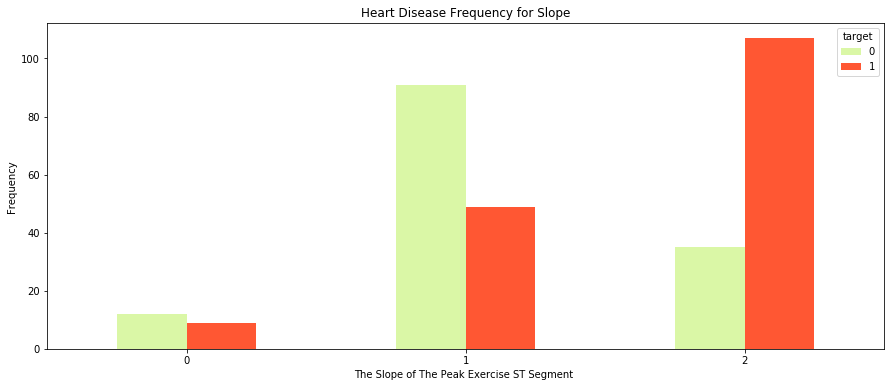

In [14]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

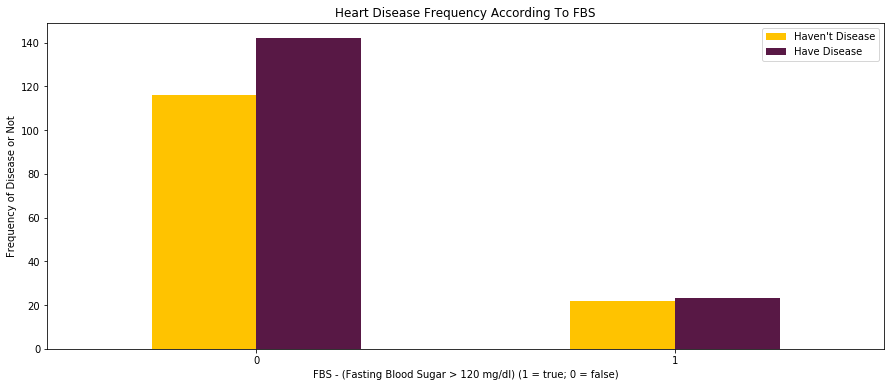

In [15]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

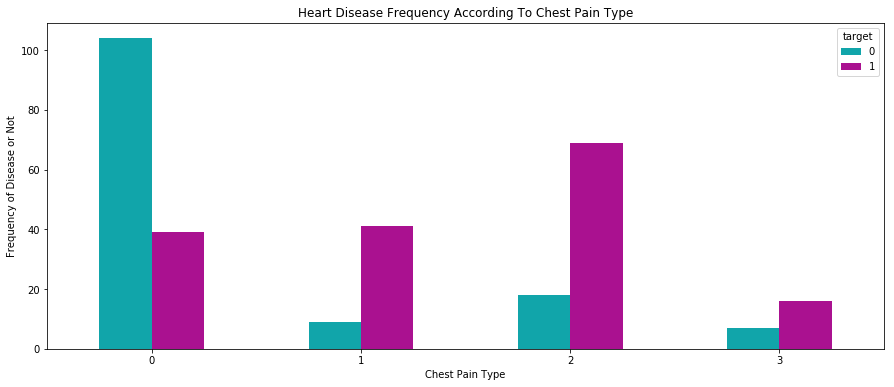

In [16]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

<a name="3.1"></a>
<h4>3.1 Creating dummy variables</h4>
<p>Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.</p>

In [17]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")


In [18]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

<a name="4"></a>
<h3>4. Creating models</h3>
<a name="4.1"></a>
<h4>4.1 Normalize the data</h4>

In [24]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

<p>We will split our data. 80% of our data will be train data and 20% of it will be test data.</p>

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [27]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

<a name="4.2"></a>
<h4>4.2 K-Nearest Neigbour (KNN) Classification</h4>

In [29]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


In [38]:
accuracies = {}

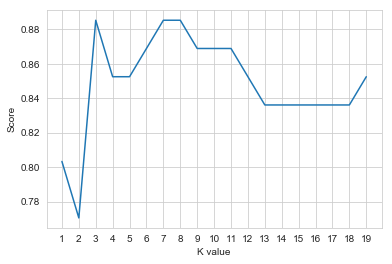

Maximum KNN Score is 88.52%


In [65]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

<p>As you can see above if we define k as 3-7-8 we will reach maximum score.</p>

<b><p>KNN Model's Accuracy is 88.52%</p></b>

<a name="4.3"></a>
<h4>4.3 Support Vector Machine (SVM) Algorithm</h4>

In [34]:
from sklearn.svm import SVC

In [77]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.89%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<b><p>Test Accuracy of SVM Algorithm is 86.89%</p></b>

<a name="4.4"></a>
<h4>4.4 Naive Bayes Algorithm</h4>

In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
acc = nb.score(x_test.T,y_test.T)*100
accuracies['NaiveBayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


<b><p>Accuracy of Naive Bayes: 86.89%</p></b>

<a name="5"></a>
<h3>5. Comparing Models</h3>

In [78]:
keys = accuracies.keys()
print(list(keys))
vals = accuracies.values()

['KNN', 'NaiveBayes', 'SVM']


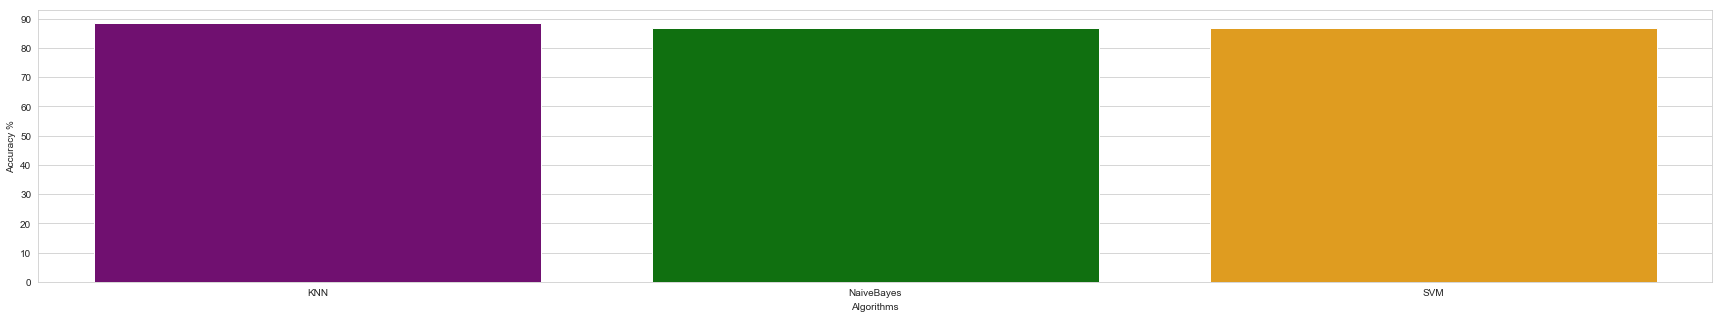

In [79]:
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(30,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(keys),y=list(vals), palette=colors)
plt.show()

<a name="6"></a>
<h3>6. Confusion Matrix</h3>

In [45]:
# Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)

In [46]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)

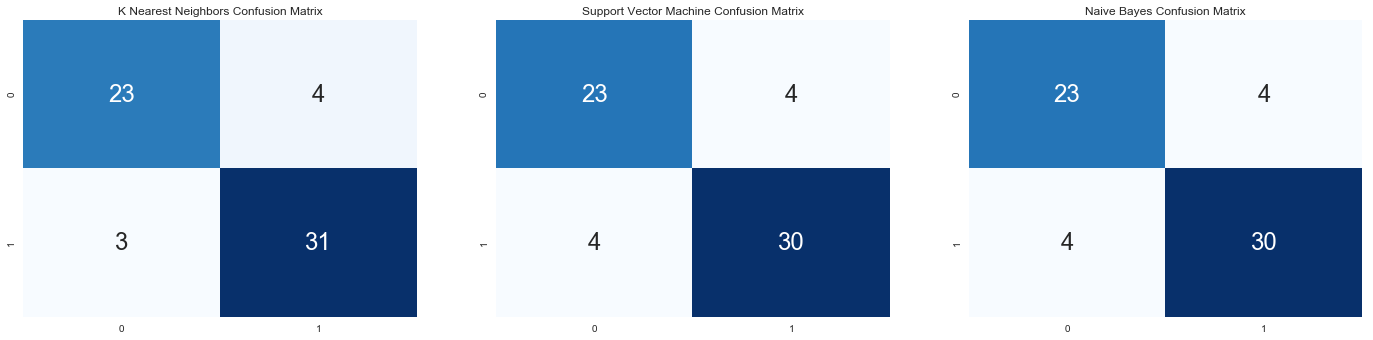

In [49]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

<a name="7"></a>
<h4>7. Conclusion</h4>
<p>The models implemented on the dataset work fine but best of them is <b>KNN with 88.52%</b> of accuracy.</p>